##  Sales Prediction using Python 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
sales=pd.read_csv('advertising.csv')

In [3]:
print(sales.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [4]:
print(sales .describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [5]:
sales.shape
sales

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### checking null values

In [7]:
sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Splitting the data

In [8]:
X=sales[["TV","Radio","Newspaper"]]
Y=sales["Sales"]

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [10]:
print(X.shape,X_train.shape,X_test.shape)

(200, 3) (160, 3) (40, 3)


### Correlation betweeen Variables

In [11]:
sales.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


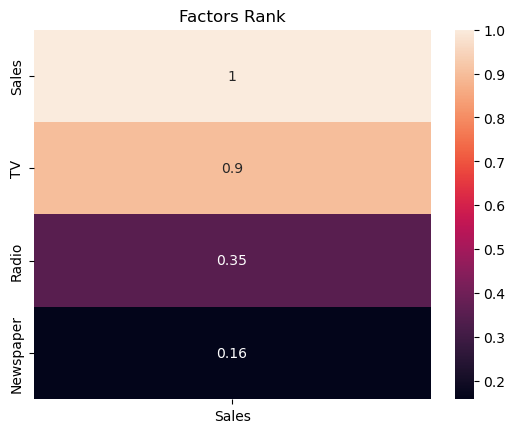

In [12]:
sns.heatmap(sales.corr()[['Sales']].sort_values(by='Sales', ascending=False), annot = True)
plt.title('Factors Rank')
plt.show()

### Data Visualization 

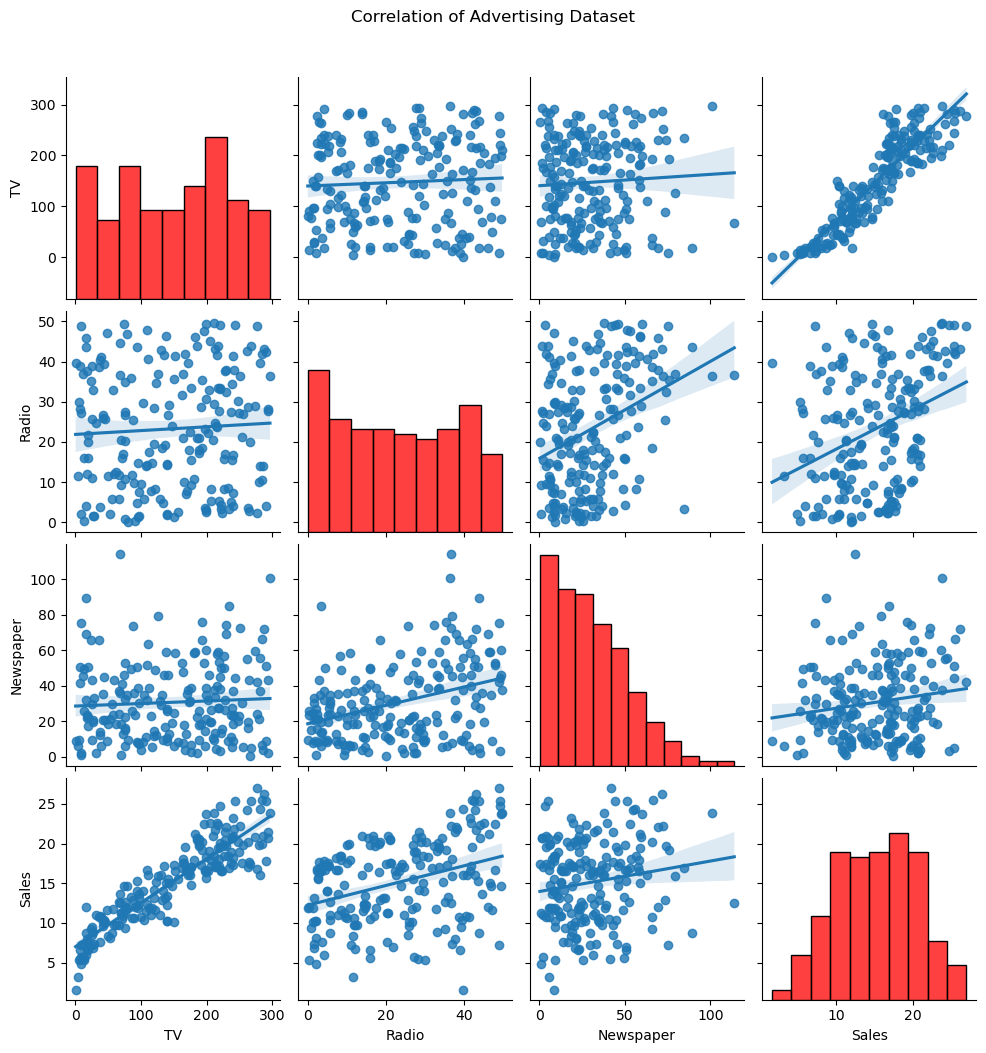

In [13]:
g = sns.pairplot(sales, kind='reg', diag_kws = {'color' : 'red'})
g.fig.suptitle("Correlation of Advertising Dataset", y= 1.05)

plt.show()

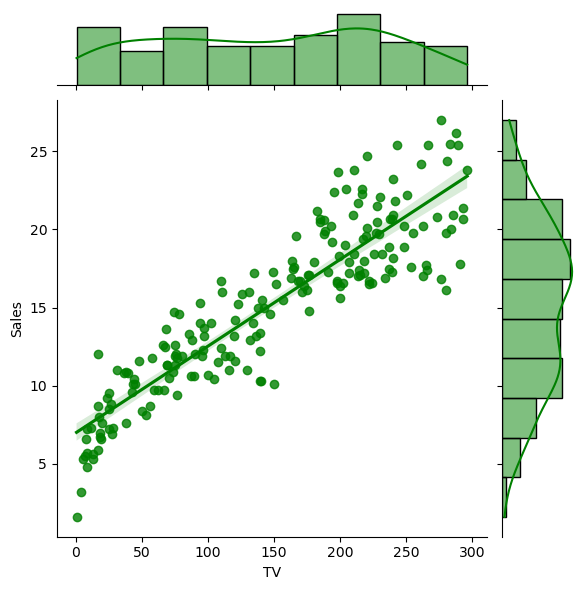

In [14]:
sns.jointplot(x="TV", y="Sales",data=sales,kind="reg",color="green")

plt.show()

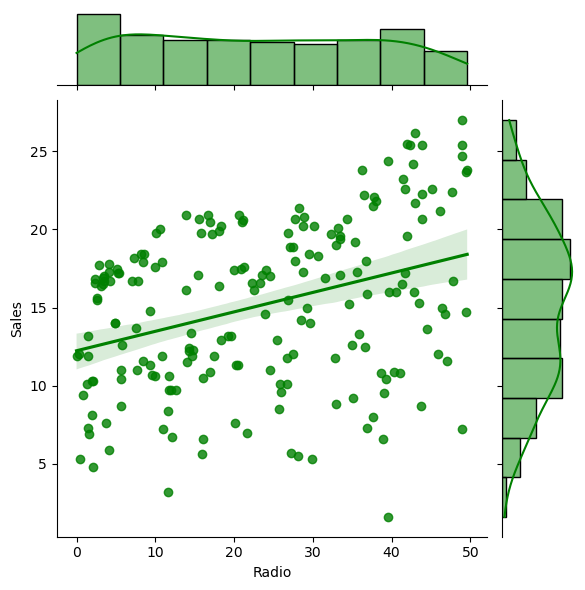

In [15]:
sns.jointplot(x="Radio", y="Sales",data=sales,kind="reg",color="green")

plt.show()

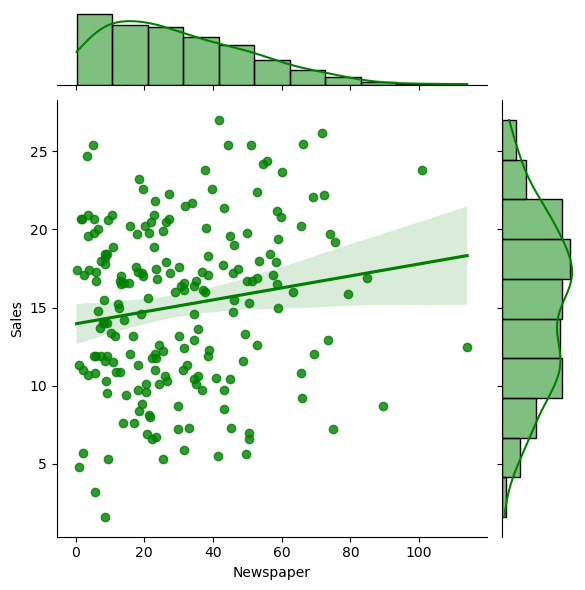

In [16]:
sns.jointplot(x="Newspaper", y="Sales",data=sales,kind="reg",color="green")

plt.show()

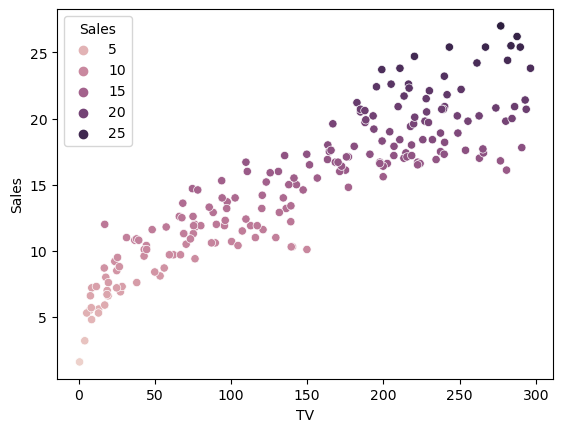

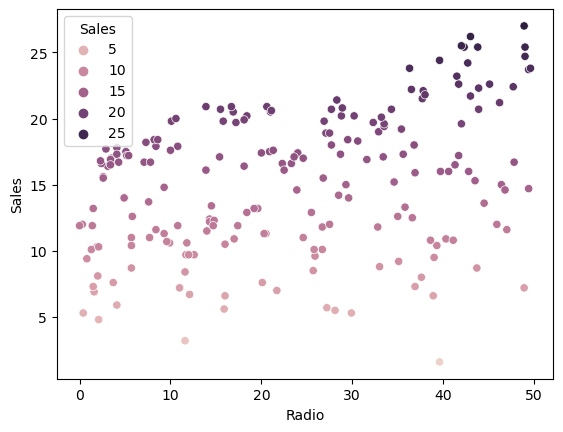

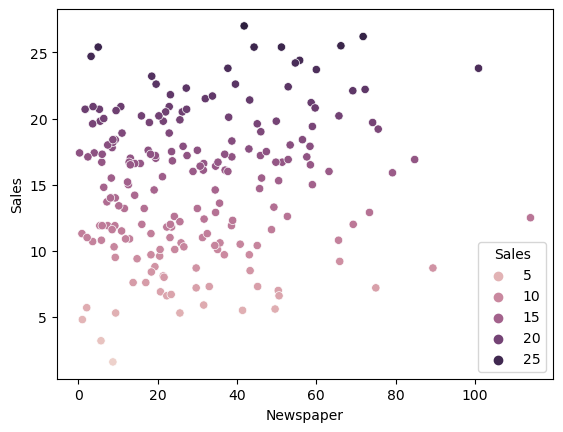

In [17]:
columns = sales.columns[:-1]
for col in columns:
    sns.scatterplot(x=col,y='Sales',data=sales, hue = sales['Sales'])
    plt.show()
    
    
    
    
# TV advertisements and Sales are strongly correlated

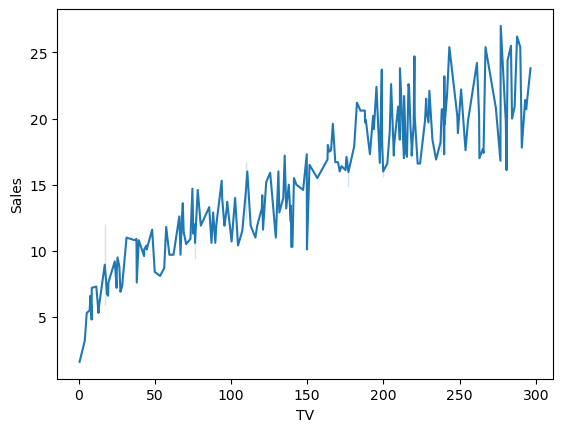

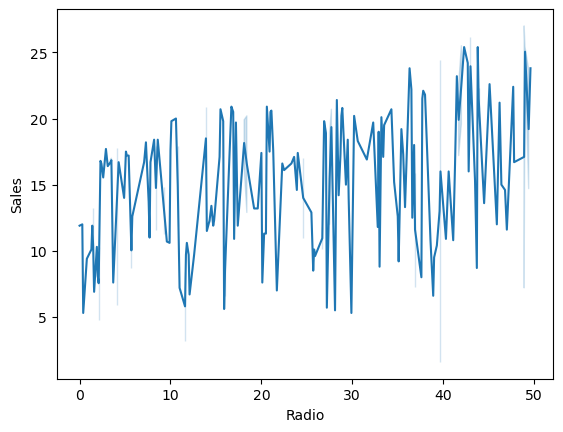

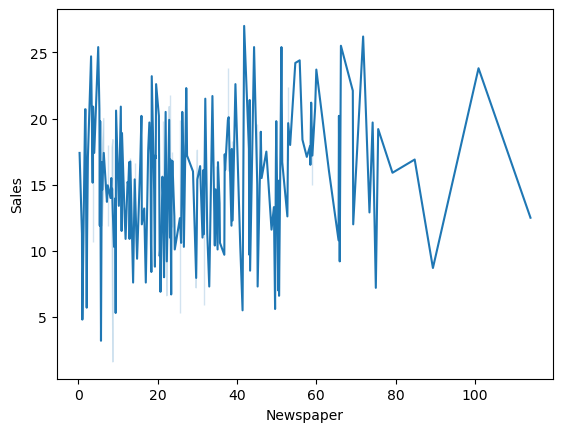

In [18]:
sns.lineplot(data=sales,y='Sales',x='TV')
plt.show()

sns.lineplot(data=sales,y='Sales',x='Radio')
plt.show() 

sns.lineplot(data=sales,y='Sales',x='Newspaper')
plt.show()

In [19]:
y=sales["Sales"]
X=sales[["TV","Radio","Newspaper"]]
print("X Shape",X.shape,"----------","y Shape",y.shape)

X Shape (200, 3) ---------- y Shape (200,)


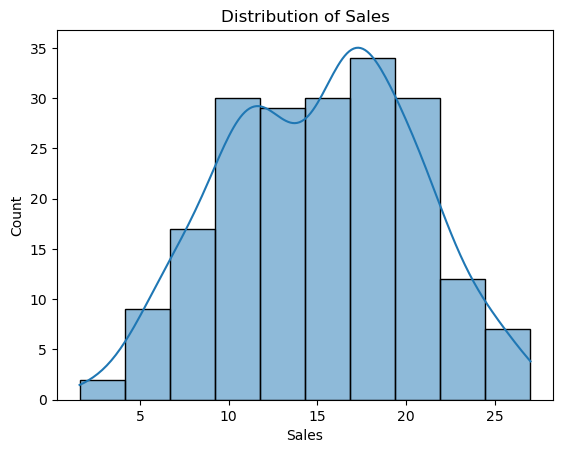

In [20]:
sns.histplot(sales['Sales'], kde=True)
plt.xlabel('Sales')
plt.ylabel('Count')
plt.title('Distribution of Sales')
plt.show()

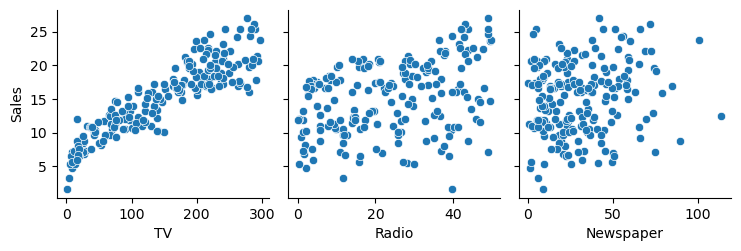

In [21]:
sns.pairplot(sales, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

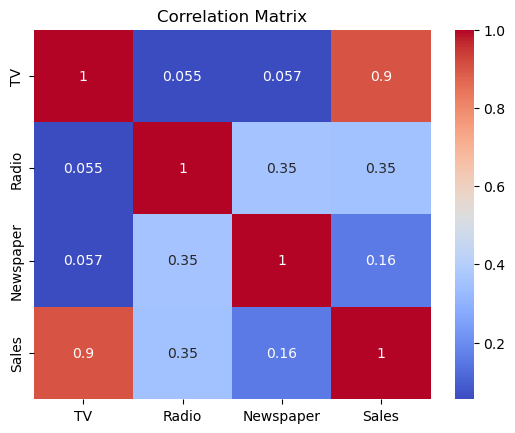

In [22]:
correlation = sales[['TV', 'Radio', 'Newspaper', 'Sales']].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Model

In [23]:
model=LinearRegression()

In [24]:
model.fit(X_train,Y_train)

LinearRegression()

In [25]:
y_predict=model.predict(X_test)

In [26]:
MSE=mean_squared_error(Y_test,y_predict)

In [27]:
MSE

2.9077569102710923

In [28]:
RMSE=mean_squared_error(Y_test,y_predict,squared=False)

In [29]:
RMSE

1.7052146229349232

In [30]:
r2=r2_score(Y_test,y_predict)

In [31]:
r2

0.9059011844150826